# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Votre nom: Ulysse Ristorcelli

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [224]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [225]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [226]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [227]:
regions = list(df.region.unique())

In [228]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [229]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [230]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [231]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

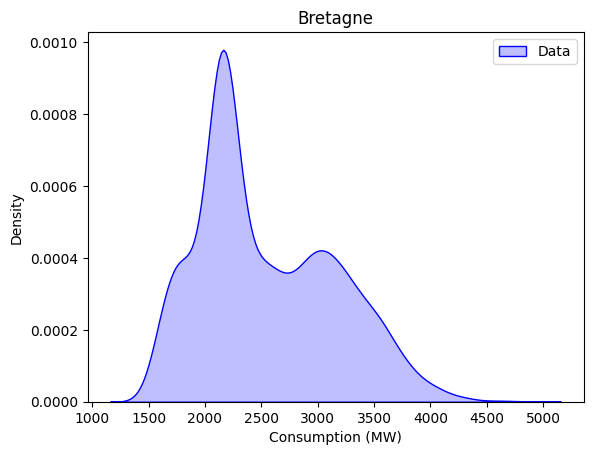

In [232]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

$$

\begin{align*}
E(\mu-\hat{\mu}) & = E(\mu) - E(\hat{\mu}) \\
& = \mu - \frac{1}{n} \sum_{i=1}^n E(x_i) \\
& = \mu - \frac{1}{n} \sum_{i=1}^n \mu \\
& = \mu - \mu \\
& = 0
\end{align*}
$$

L'estimateur pour la moyenne est donc sans biais, par définition.

\begin{aligned}
E(\hat{\sigma}^2) & = \frac{1}{n-1} \sum_{i=1}^n E\left((x_i - \hat{\mu})^2\right) \\
& = \frac{1}{n-1} \sum_{i=1}^n \left[E\left(x_i^2\right) - 2E\left(x_i \hat{\mu}\right) + E\left(\hat{\mu}^2\right)\right]
\end{aligned}

Or,

$$\forall i \text{ : }   E\left(x_i^2\right) = \sigma^2 + \mu^2 \text{ car } x_i \sim \mathcal{N}\left(\mu, \sigma^2\right) $$

\begin{aligned}
E(x_i\cdot\hat{\mu}) & = \frac{1}{n} E\left(x_i^2\right) + \frac{1}{n} \sum_{j=1 \atop j \neq i}^n E\left(x_i x_j\right) \\
& = \frac{\sigma^2 + \mu^2}{n} + \frac{1}{n} \sum_{j=1 \atop j \neq i}^n E\left(x_i\right) E\left(x_j\right) \text{ car les xi sont i.i.d }\\
& = \frac{\sigma^2 + \mu^2}{n} + \frac{n-1}{n} \mu^2 \\
& = \frac{\sigma^2}{n} + \mu^2
\end{aligned}

\begin{aligned}
E\left(\hat{\mu}^2\right) & = \frac{1}{n^2} E\left(\sum_{i=1}^n x_i^2 + \sum_{\substack{i=1 \\ j=1 \\ i \neq j}}^n x_i x_j\right) \\
& = \frac{E\left(x_1^2\right)}{n} + \frac{n-1}{n} \mu^2 \text{ car les xi sont i.i.d }\\
& = \frac{\sigma^2}{n} + \mu^2
\end{aligned}

Donc, finalement: 
$$ \begin{aligned}
E\left(\hat{\sigma}^2\right) & = \frac{n}{n-1}\left[\sigma^2+\mu^2-2\left(\frac{\sigma^2}{n}+\mu\right)+\frac{\sigma^2}{n}+\mu^2\right] \\
& = \sigma^2
\end{aligned}
$$
Or, b($\sigma^2, \hat\sigma^2$) = E($\sigma^2 - \hat\sigma^2$) = $\sigma^2 - E(\hat\sigma^2$ ) = 0 par ce qui précède.

Donc l'estimateur pour la variance est sans biais.


2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [233]:
mean_Br = df_region["consumption"].mean()
print("valeur obtenue pour la moyenne: ",mean_Br)

var_Br = df_region["consumption"].var()
print("valeur obtenue pour la variance: ", var_Br)

valeur obtenue pour la moyenne:  2546.536155666579
valeur obtenue pour la variance:  365956.0141448174


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [234]:
new_data = np.random.normal(mean_Br, np.sqrt(var_Br), df_region["consumption"].count())

4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

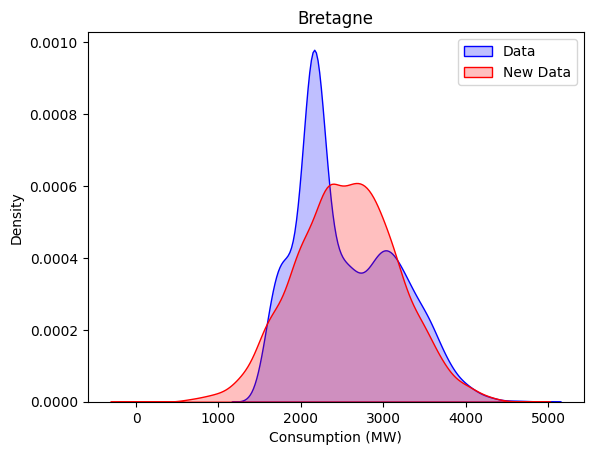

In [235]:
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=new_data, label="New Data", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

C:\Users\Ulysse\AppData\Local\Temp\ipykernel_13876\1450054279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["date"] = pd.to_datetime(df_region["date"])


valeur obtenue pour la moyenne:  3198.19955654102
valeur obtenue pour la variance:  167303.49620402063


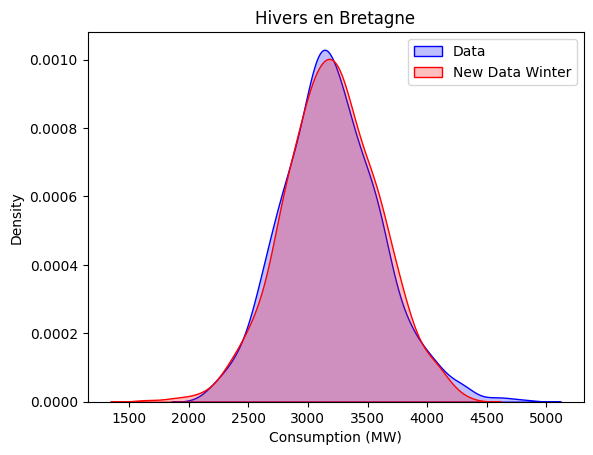

In [236]:
df_region_winter = []

# On convertit les dates en datetime
df_region["date"] = pd.to_datetime(df_region["date"])

for year in range(df_region['date'].dt.year.min(), df_region['date'].dt.year.max() + 1):
    start_date = pd.to_datetime(f'{year}-12-22')
    end_date = pd.to_datetime(f'{year + 1}-03-21')
    
    df_region_filtered = df_region.loc[(df_region['date'] >= start_date) & (df_region['date'] <= end_date)]
    
    df_region_winter.append(df_region_filtered)
df_region_winter = pd.concat(df_region_winter, ignore_index=True)

# Calcul de la moyenne et de la variance
mean_Br_Wint = df_region_winter["consumption"].mean()
print("valeur obtenue pour la moyenne: ",mean_Br_Wint)

var_Br_Wint = df_region_winter["consumption"].var()
print("valeur obtenue pour la variance: ", var_Br_Wint)

new_data_winter = np.random.normal(mean_Br_Wint, np.sqrt(var_Br_Wint), df_region_winter["consumption"].count())

sns.kdeplot(data=df_region_winter, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=new_data_winter, label="New Data Winter", color='red', fill=True)
plt.title("Hivers en Bretagne")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

On constate que l'hypothèse gaussienne est appropirée quand on se restreint à étudier une saison uniquement.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctions de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Votre réponse :

On suppose que d(f,g)=0. Donc $\frac 1 2 \int |f(x) - g(x)| \mathrm dx = 0$
Or, |f(x) - g(x)| $\geq$ 0. Donc par positivité de l'intégrale, on a: |f(x) - g(x)| = 0 pour presque tout x.
Soit f(x) = g(x), pour presque tout x. Donc f = g presque partout (pour la mesure de Lebesgue)

Réciproquement, si f = g presque partout, il est évident que $\frac 1 2 \int |f(x) - g(x)| \mathrm dx = 0$ 
Donc d(f,g) = 0


On suppose que f et g ont des supports disjoints. Dans ce cas, $\frac 1 2 \int |f(x) - g(x)| \mathrm dx = \frac 1 2 (\int |f(x)| \mathrm dx + \int |g(x)| \mathrm dx) = \frac 1 2 (1 + 1) = 1 $. Car f et g sont des densités de probabilités.

Réciproquement, on suppose que $\frac 1 2 \int |f(x) - g(x)| \mathrm dx = 1$ et que $ \operatorname{supp}(f)\cap\operatorname{supp}(g) \neq\emptyset $

$$
Or, \frac 1 2 \int |f(x) - g(x)| \mathrm dx = \frac 1 2 \int f(x) \mathrm dx + \frac 1 2 \int g(x) \mathrm dx - \int_{\operatorname{supp}(f)\cap\operatorname{supp}(g)}  \operatorname{min}(f(x), g(x))  \leq 1 - \int_{\operatorname{supp}(f)\cap\operatorname{supp}(g)} f(x) < 1
$$
 En effet, f est une fonction de densité, donc f est positive presque partout pour la mesure de Lebesgue. 

On arrive donc à la contradiction 1 < 1, ce qui n'est pas. 
On en déduit que $ \operatorname{supp}(f)\cap\operatorname{supp}(g) = \emptyset $
ie, f et g sont à supports disjoints.

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [237]:
kde = gaussian_kde(df_region["consumption"])
density = gaussian_kde(new_data)

# On créer la fonction que l'on veut intégrer
inter_fct = lambda x: 0.5 * abs(kde(x) - density(x))

# Pour calculer d(f,g) on utilise la méthode des trapèzes
x = np.linspace(min(df_region["consumption"].min(), new_data.min()), max(df_region["consumption"].max(), new_data.max()), 10000)
dissimilarity = np.trapz(inter_fct(x), x)
print("Après calcul, la dissimilarité vaut:", dissimilarity)

Après calcul, la dissimilarité vaut: 0.16858537515591243


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [238]:
kde_winter = gaussian_kde(df_region_winter["consumption"])
density_winter = gaussian_kde(new_data_winter)

# On créer la fonction que l'on veut intégrer
inter_fct_winter = lambda x: 0.5 * abs(kde_winter(x) - density_winter(x))

# Pour calculer d(f,g) on utilise la méthode des trapèzes
x = np.linspace(min(df_region_winter["consumption"].min(), new_data_winter.min()), max(df_region_winter["consumption"].max(), new_data_winter.max()), 10000)
dissimilarity_winter =np.trapz(inter_fct_winter(x),x)
print("Après calcul, la dissimilarité en hiver vaut:", dissimilarity_winter)

Après calcul, la dissimilarité en hiver vaut: 0.030186992325145975


4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [239]:
dissimilarities = []

for reg in regions:
    df_rg = df[df.region == reg]
    mean_rg = df_rg["consumption"].mean()
    var_rg = df_rg["consumption"].var()
    
    new_data_rg = np.random.normal(mean_rg, np.sqrt(var_rg), df_rg["consumption"].count())
    kde_rg = gaussian_kde(df_rg["consumption"])
    density_rg = gaussian_kde(new_data_rg)

    # On créer la fonction que l'on veut intégrer
    inter_fct_rg = lambda x: 0.5 * abs(kde_rg(x) - density_rg(x))

    # Pour calculer d(f,g) on utilise la méthode des trapèzes
    x = np.linspace(min(df_rg["consumption"].min(), new_data_rg.min()), max(df_rg["consumption"].max(), new_data_rg.max()), 1000)
    dissimilarity_rg = np.trapz(inter_fct_rg(x), x)
    dissimilarities.append(dissimilarity_rg)

dissimilarities_winter = []

for reg in regions:
    
    df_rg = df[df.region == reg]
    df_rg_winter = []

    # On convertit les dates en datetime
    df_rg["date"] = pd.to_datetime(df_rg["date"])

    for year in range(df_rg['date'].dt.year.min(), df_rg['date'].dt.year.max() + 1):
        start_date = pd.to_datetime(f'{year}-12-22')
        end_date = pd.to_datetime(f'{year + 1}-03-21')
        
        df_rg_filtered = df_rg.loc[(df_rg['date'] >= start_date) & (df_rg['date'] <= end_date)]
        
        df_rg_winter.append(df_rg_filtered)

    df_rg_winter = pd.concat(df_rg_winter, ignore_index=True)   
    mean_rg_winter = df_rg_winter["consumption"].mean()
    var_rg_winter = df_rg_winter["consumption"].var()
    
    new_data_rg_winter = np.random.normal(mean_rg_winter, np.sqrt(var_rg_winter), df_rg_winter["consumption"].count())
    kde_rg_winter = gaussian_kde(df_rg_winter["consumption"])
    density_rg_winter = gaussian_kde(new_data_rg_winter)

    # On créer la fonction que l'on veut intégrer
    inter_fct_rg_winter = lambda x: 0.5 * abs(kde_rg_winter(x) - density_rg_winter(x))

    # Pour calculer d(f,g) on utilise la méthode des trapèzes
    x = np.linspace(min(df_rg_winter["consumption"].min(), new_data_rg_winter.min()), max(df_rg_winter["consumption"].max(), new_data_rg_winter.max()), 1000)
    dissimilarity_rg_winter = np.trapz(inter_fct_rg_winter(x), x)
    dissimilarities_winter.append(dissimilarity_rg_winter)

#On créer le DataFrame final
df_sim = pd.DataFrame(columns=['regions','dissimilarities','winter_dissimilarities'])

for i,reg in enumerate(regions):
    row = {'regions': reg, 'dissimilarities': dissimilarities[i], 'winter_dissimilarities': dissimilarities_winter[i]}
    df_sim= pd.concat([df_sim, pd.DataFrame([row])])

#On rajoute des indices aux lignes
df_sim = df_sim.reset_index(drop=True)

C:\Users\Ulysse\AppData\Local\Temp\ipykernel_13876\3556912652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rg["date"] = pd.to_datetime(df_rg["date"])
C:\Users\Ulysse\AppData\Local\Temp\ipykernel_13876\3556912652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rg["date"] = pd.to_datetime(df_rg["date"])
C:\Users\Ulysse\AppData\Local\Temp\ipykernel_13876\3556912652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [240]:
df_sim

,regions,dissimilarities,winter_dissimilarities
0,Auvergne-Rhône-Alpes,0.161381,0.038894
1,Bourgogne-Franche-Comté,0.118133,0.050725
2,Bretagne,0.190563,0.055290
3,Centre-Val de Loire,0.181288,0.055486
4,Grand Est,0.122044,0.046126
5,Hauts-de-France,0.125892,0.035470
6,Normandie,0.173372,0.041992
7,Nouvelle-Aquitaine,0.225117,0.053068
8,Occitanie,0.219751,0.059245
9,Pays de la Loire,0.176879,0.050078


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [241]:
best_fit_winter = df_sim['winter_dissimilarities'].min()
best_fit_winter_id = df_sim['winter_dissimilarities'].idxmin()
region_best_fit_winter = df_sim.loc[best_fit_winter_id]
print("La région", region_best_fit_winter["regions"],"a le plus petit fit avec le modèle gaussien (", best_fit_winter,")")

La région Hauts-de-France a le plus petit fit avec le modèle gaussien ( 0.035469639764813904 )


6. Pour cette région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

C:\Users\Ulysse\AppData\Local\Temp\ipykernel_13876\1020485533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_best_fit["date"] = pd.to_datetime(df_region_best_fit["date"])


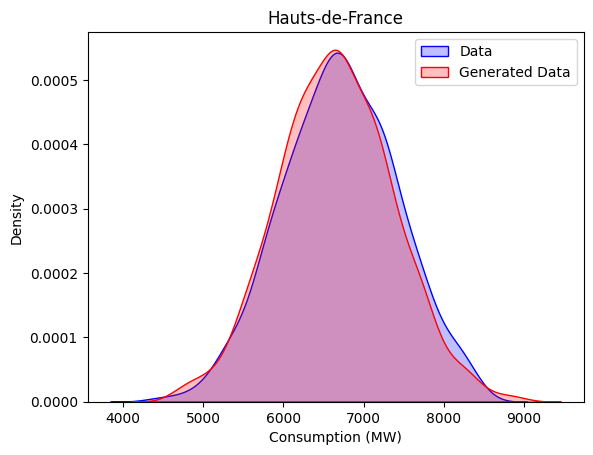

In [242]:
df_region_best_fit = df[df["region"] == region_best_fit_winter["regions"]]
df_region_winter_best_fit = []
# On convertit les dates en datetime
df_region_best_fit["date"] = pd.to_datetime(df_region_best_fit["date"])

for year in range(df_region_best_fit['date'].dt.year.min(), df_region_best_fit['date'].dt.year.max() + 1):
    start_date = pd.to_datetime(f'{year}-12-22')
    end_date = pd.to_datetime(f'{year + 1}-03-21')
    
    df_region_filtered_best_fit = df_region_best_fit.loc[(df_region_best_fit['date'] >= start_date) & (df_region_best_fit['date'] <= end_date)]
    
    df_region_winter_best_fit.append(df_region_filtered_best_fit)
df_region_winter_best_fit = pd.concat(df_region_winter_best_fit, ignore_index=True)

# Calcul de la moyenne et de la variance
mean_Br_Wint_best_fit = df_region_winter_best_fit["consumption"].mean()
var_Br_Wint_best_fit = df_region_winter_best_fit["consumption"].var()

new_data_winter_best_fit = np.random.normal(mean_Br_Wint_best_fit, np.sqrt(var_Br_Wint_best_fit), df_region_winter_best_fit["consumption"].count())

sns.kdeplot(data=df_region_winter_best_fit, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=new_data_winter_best_fit, label="Generated Data", color='red', fill=True)
plt.xlabel("Consumption (MW)")
plt.title(region_best_fit_winter["regions"])
plt.legend() 
plt.show()

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$ MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$ MW et l'écart-type $\sigma_0=500$ MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :

\begin{align*}
Π(\mu|X) ∝ \exp\left(-\sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma^2}\right)\cdot\exp\left(-\sum_{i=1}^n \frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right) \\
∝ \ exp\left(-(\sum_{i=1}^n \frac{(\mu^2 - 2x_1\mu)}{2\sigma^2} + \frac {\mu^2 -2\mu\mu_0}{2\sigma_0^2})\right) \\
∝ \ exp\left(-(\sum_{i=1}^n (\frac{1}{2\sigma^2} + \frac{1}{2\sigma_0^2})\mu^2 + (\frac {x_1} {\sigma^2} + \frac {\mu_0} {\sigma_0^2})\mu\right) \\
\end{align*}

On reconnaît alors une loi normale de variance $ \sigma_p^2 = \frac {\sigma^2\sigma_0^2} {\sigma^2 + n\sigma_0^2} $

On en déduit donc que la moyenne vaut $ \mu_p = \frac {\mu_0\sigma^2 + \sigma_0^2\sum_{i=1}^n x_1} {n\sigma_0^2 + \sigma^2} $

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée indépendament, dans un seul dataframe.

In [243]:
df_param = pd.DataFrame(columns=['year','mu','sigma'])

df_winter_Br_2023 = pd.DataFrame(columns=df_region.columns) # Utile pour la suite

mu_0 = 3500
sigma = 400
sigma_0=500

# Rappel df_region contient les données pour la région Bretagne
df_region["date"] = pd.to_datetime(df_region["date"])

for i in range(2013,2023):

    start_date = pd.Timestamp(f'{i}-12-22')
    end_date = pd.Timestamp(f'{i+1}-03-21')
    df_region_winter_year = df_region[(df_region['date']>= start_date) & (df_region["date"]<= end_date)]
    if i==2022:
        df_winter_Br_2023 = df_region_winter_year
    sum_xi = df_region_winter_year["consumption"].sum()
    mu = (mu_0*(sigma)**2 + sigma_0**2 *sum_xi)/(df_region_winter_year["consumption"].count()*(sigma_0)**2 + (sigma)**2)
    new_sigma = ((sigma_0)**2 * (sigma)**2)/(df_region_winter_year["consumption"].count()*(sigma_0)**2 + (sigma)**2)
    row = {'year': i+1, 'mu': mu, 'sigma': new_sigma} #winter n = december of year (n-1) to march of year n
    df_param = pd.concat([df_param, pd.DataFrame([row])])

#On rajoute des indices aux lignes
df_param = df_param.reset_index(drop=True)

C:\Users\Ulysse\AppData\Local\Temp\ipykernel_13876\1520316013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["date"] = pd.to_datetime(df_region["date"])
C:\Users\Ulysse\AppData\Local\Temp\ipykernel_13876\1520316013.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_param = pd.concat([df_param, pd.DataFrame([row])])


In [244]:
df_param

,year,mu,sigma
0,2014,3095.134598,1765.225066
1,2015,3229.578553,1765.225066
2,2016,3133.762549,1745.962462
3,2017,3275.816417,1765.225066
4,2018,3328.695940,1765.225066
5,2019,3179.931598,1765.225066
6,2020,3124.061545,1745.962462
7,2021,3360.657546,1765.225066
8,2022,3216.041483,1765.225066
9,2023,3061.154016,1765.225066


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

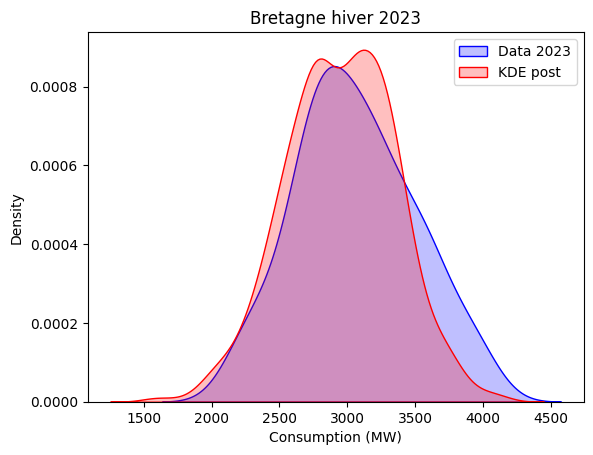

In [245]:
post_param = df_param.iloc[9] #2023
post_mean = post_param['mu']
post_var = post_param['sigma']

rand_mu = np.random.normal(post_mean, np.sqrt(post_var))
new_data_post = np.random.normal(rand_mu, sigma , df_region_winter["consumption"].count())

sns.kdeplot(data=df_winter_Br_2023, x="consumption", label="Data 2023", color='blue', fill=True)
sns.kdeplot(data=new_data_post, label="KDE post", color='red', fill=True)
plt.xlabel("Consumption (MW)")
plt.title("Bretagne hiver 2023")
plt.legend() 
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Votre réponse :

Il est clair que l'on obtient un meilleur résultat à la fin de la partie A. Il semble donc préférable de considérer tous les hivers et de calculer la moyenne et la variance, plutôt que de calculer la moyenne a posteriori seulement grâce aux données d'une seule année...

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouhaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Votre réponse :

On pose les deux hypothèses suivantes:

$ H_0 =\{\sigma = \sigma_0 = 500\} $
et $ H_1 =\{\sigma = \sigma_1 = 400\} $

On calcule alors le rapport de vraisemblance à l'aide des densités pour les deux hypothèses, sachant que les $x_i$ sont i.i.d:
\begin{align*}
T(X) &= \frac{p_1(X)}{p_0(X)} \\
&= \frac{\sigma_0^{\frac{n}{2}}\cdot\exp\left(-\sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma_1}\right)}{\sigma_1^{\frac{n}{2}}\cdot\exp\left(-\sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma_0}\right)} \\
T(X) &= \frac{\sigma_0^{\frac{n}{2}}}{\sigma_1^{\frac{n}{2}}} \cdot \exp\left(-\sum_{i=1}^n \frac{(x_i - \mu)^2}{2}\right) \cdot \left(\frac{1}{\sigma_1^{2}} - \frac{1}{\sigma_0^{2}}\right)
\end{align*}

On pose alors $\sigma_T = \frac {\sigma_0\sigma_1} {\sigma_0^{2} - \sigma_1^{2}} \geq 0$

La décision $\delta$ vaut donc:

$$ \delta =
\begin {cases}
    1, & \text{si } T(X) > c_\alpha \\
    0, & \text{sinon}
\end{cases} $$

On a:

\begin{align*}
T(X) > c_\alpha &\iff \frac{\sigma_0^{\frac{n}{2}}}{\sigma_1^{\frac{n}{2}}} \cdot \exp\left(-\sum_{i=1}^n \frac{(x_i - \mu)^2}{2}\right) \cdot \left(\frac{1}{\sigma_1^{2}} - \frac{1}{\sigma_0^{2}}\right) > c_\alpha \\
&\iff \sum_{i=1}^n (x_i - \mu)^2 < 2\ln\left(\frac{\sigma_1^{\frac{n}{2}}} {\sigma_0^{\frac{n}{2}}}\cdot c_\alpha\right) \cdot \sigma_T^2 \\
&\iff \sum_{i=1}^n \frac{(x_i - \mu)^2}{\sigma_0^2} < \frac {2} {\sigma_0^2} \ln\left(\frac{\sigma_1^{\frac{n}{2}}} {\sigma_0^{\frac{n}{2}}}\cdot c_\alpha\right) \cdot \sigma_T^2 = {c_\alpha'}
\end{align*}

On pose, $Y_i = \frac{(x_i - \mu)}{\sigma_0}$ qui est suit une loi gaussienne centrée réduite.
On remarque alors que $\sum_{i=1}^n Y_i^2$ suit une loi $ χ^2 $. On en déduit que le risque de première espèce vaut:

$$ P_{H_0}(\sum_{i=1}^n Y_i^2 < {c_\alpha'}) = \alpha $$

2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [260]:
# {c_\alpha'}
alpha = 0.01
mu = 3200
quantile = chi2.ppf(1-alpha, df_winter_Br_2023.count()[0]) #n degré de liberté

Y = (df_winter_Br_2023.consumption - mu) / sigma_0
sum = 0

for Y_i in Y:
    sum += Y_i**2

if sum < quantile:
    print("L'hypothèse H0 est rejetée")
else:
    print("L'hypothèse H0 est retenue")

L'hypothèse H0 est rejetée


C:\Users\Ulysse\AppData\Local\Temp\ipykernel_13876\404935527.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quantile = chi2.ppf(1-alpha, df_winter_Br_2023.count()[0]) #n degré de liberté


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

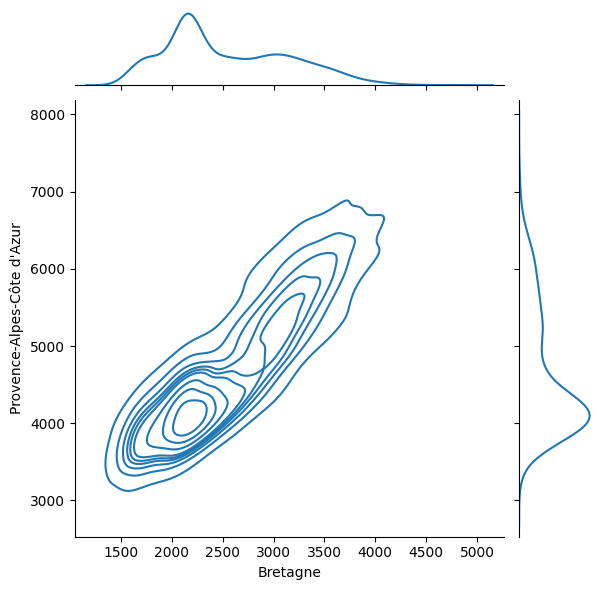

In [247]:
df_provence = df[df.region == "Provence-Alpes-Côte d'Azur"]
joint_data = pd.DataFrame()

for i in range(df_region["consumption"].count()): #Both regions have the same number of data
    row = {"Bretagne": df_region.iloc[i]["consumption"], "Provence-Alpes-Côte d'Azur": df_provence.iloc[i]["consumption"]}
    joint_data = pd.concat([joint_data, pd.DataFrame([row])])

sns.jointplot(x="Bretagne", y="Provence-Alpes-Côte d'Azur", data = joint_data, kind= "kde")
plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Votre réponse : Non, la consommation dans ces deux régions est dépendante. En effet, si elle était indépendante, on aurait un nuage de point parfaitement disséminé. Or, ici, on constate que les points se répartissent suivant une droite.

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Votre réponse : Je n'ai pas traité cette question.

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [248]:
# Je n'ai pas traité cette question.

## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [253]:
n = df_winter_Br_2023.count()[0]

# On ne connait ni la moyenne, ni la variance: la statistique suit une loi de student(n-1)
quant_95 = t.ppf(1-0.05/2, n-1)

sum_S = 0
for i in range(n):
    sum_S += (df_winter_Br_2023.iloc[i]["consumption"] - mean_Br_Wint)**2

sum_S = np.sqrt(sum_S/(n-1))

mean_Br_Wint_2023 = df_winter_Br_2023["consumption"].mean()
#Formules pour les bornes de l'intervalle dans ce cas:
borne_inf = mean_Br_Wint_2023 - sum_S*quant_95/np.sqrt(n)
borne_sup = mean_Br_Wint_2023 + sum_S*quant_95/np.sqrt(n)

print("L'intervalle de confiance est: [",borne_inf,",",borne_sup,"].")

L'intervalle de confiance est: [ 2962.052341943805 , 3154.0143247228616 ].


C:\Users\Ulysse\AppData\Local\Temp\ipykernel_13876\168814694.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n = df_winter_Br_2023.count()[0]


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [256]:
quant_student = t.ppf(1 - 0.05/2, n-1)
mu_student = 3100

term = (mean_Br_Wint_2023 - mu_student)/(sum_S/np.sqrt(n))
if (term > - quant_student and term < quant_student):
    print("La moyenne est égale à 3100MW")
else :
    print("On se situe dans la zone de rejet du test de Student. La moyenne n'est donc pas égale à 3100MW")

La moyenne est égale à 3100MW
